In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Palatino', 'Georgia'],  # Add or remove font names as needed
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amsfonts}',
    'font.size': 22  # Adjust as needed
})

In [96]:
rats=[20382,24101,21012,22295,20630,22098,23783,24116]
path="../data_bool/"
#df = pd.DataFrame()
rat=24116
df=pd.read_json(path+"Rat_"+str(rat)+"_BOOLop_resrel_data.json")

In [97]:
# for ratid in rats:
#     tmp_df=pd.read_json(path+"Rat_"+str(ratid)+"_BOOLop_resrel_data.json")
#     df = pd.concat([df,tmp_df], ignore_index=True)

In [98]:
df_AND=df.query('OP == "AND"')
df_OR=df.query('OP == "OR"')
df_XOR=df.iloc[df.query('OP == "OR"').index + 1 ]
assert np.array_equal(df_OR.U1_GID.values,df_XOR.U1_GID.values)
assert np.array_equal(df_OR.U2_GID.values,df_XOR.U2_GID.values)

In [99]:
quant='MSR'
# figname='../figures/Fig3A.png'
# figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig3A.png'

figname='../figures/Fig3A_'+str(rat)+'.png'
figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/simg/Fig3A_'+str(rat)+'.png'

In [100]:
quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)

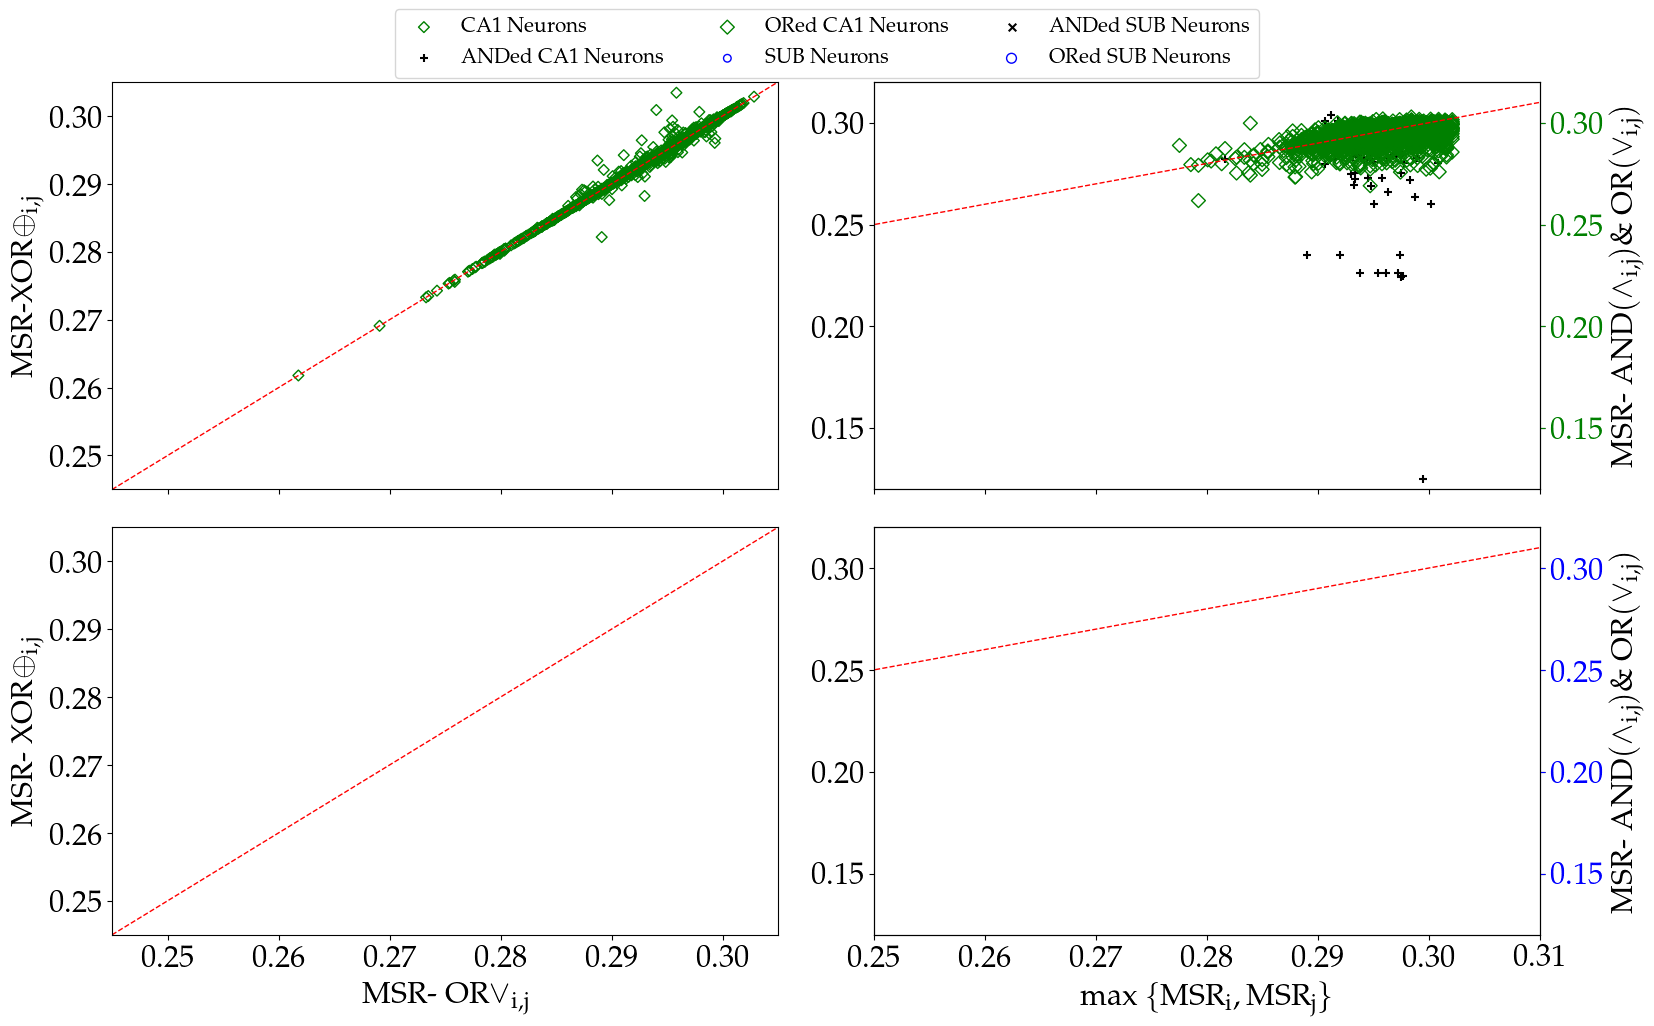

In [101]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(17,10))

qmin=0.245;qmax=0.305; mss=30 #For MSR
#qmin=0.1;qmax=0.5; mss=30 #For OHK
ax1.scatter(df_OR.query('U_LOC=="CA1"')[quant].values,df_XOR.query('U_LOC=="CA1"')[quant].values, label='CA1 Neurons', marker='D', facecolors='none',edgecolors='g',s=mss)
ax1.plot([0, qmax], [0, qmax], 'r--', lw=1) ## Diagonal Line

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)
ax1.set_ylabel(quant+r'-$\mathrm{XOR\oplus_{i,j}}$');



ax3.scatter(df_OR.query('U_LOC=="SUB"')[quant].values,df_XOR.query('U_LOC=="SUB"')[quant].values,
         label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
ax3.plot([0, qmax], [0, qmax], 'r--', lw=1) ## Diagonal Line
ax3.set_xlim([qmin,qmax]);ax3.set_ylim([qmin,qmax])
ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)
ax3.set_xlabel(quant+r'- $\mathrm{OR\lor_{i,j}}$');
ax3.set_ylabel(quant+r'- $\mathrm{XOR\oplus_{i,j}}$');




#MSR
xqmax=0.31;xqmin=0.25;
yqmax=0.32;yqmin=0.12;

#OHK
# xqmax=0.6;xqmin=0.1;
# yqmax=0.6;yqmin=0.1;
ax2.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')[quant].values,
         label='ANDed CA1 Neurons', marker='+', color='k',s=30)

ax2.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')[quant].values,
         label='ORed CA1 Neurons', marker='D', facecolors='none',edgecolors='g',s=50)
ax2.plot([0, yqmax], [0, yqmax], 'r--', lw=1) ## Diagonal Line#


ax2_twin = ax2.twinx()
ax2_twin.tick_params(axis='y', which='both', labelleft=False, labelright=True, colors='g')
ax2.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=True, labelbottom=False,labelleft=True,rotation=0)

ax2.set_xlim([xqmin,xqmax]);ax2.set_ylim([yqmin,yqmax]);ax2_twin.set_ylim([yqmin,yqmax]);
ax2_twin.set_ylabel(quant+r'- $\mathrm{AND(\land_{i,j})} \&$ $\mathrm{OR(\lor_{i,j})}$');

ax4.scatter(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')[quant].values,
         label='ANDed SUB Neurons', marker='x', color='k',s=30)

ax4.scatter(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')[quant].values,
         label='ORed SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=50)
ax4.plot([0, yqmax], [0, yqmax], 'r--', lw=1) ## Diagonal Line#


ax4_twin = ax4.twinx()
ax4_twin.tick_params(axis='y', which='both', labelleft=False, labelright=True, colors='b')
ax4.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=True, labelbottom=True,labelleft=True,rotation=0)
ax4.set_xlim([xqmin,xqmax]);ax4.set_ylim([yqmin,yqmax]);ax4_twin.set_ylim([yqmin,yqmax]);
ax4.set_xlabel(r'max \{$\mathrm{'+quant+r'_i,'+quant+r'_j}\}$');
ax4_twin.set_ylabel(quant+r'- $\mathrm{AND(\land_{i,j})} \&$ $\mathrm{OR(\lor_{i,j})}$');

handles, labels = [], []
for ax in [ax1,ax2, ax2_twin,ax3,ax4,ax4_twin]:  # Add the axes that contain the plots you want in the legend
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

# Create a single legend for the whole figure
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3,fontsize=15)


plt.subplots_adjust(wspace=0.11,hspace=0.06)
plt.tight_layout()
plt.savefig(figname,dpi=300)
plt.savefig(figname2,dpi=300)

# Single Plots

(0.25, 0.3)

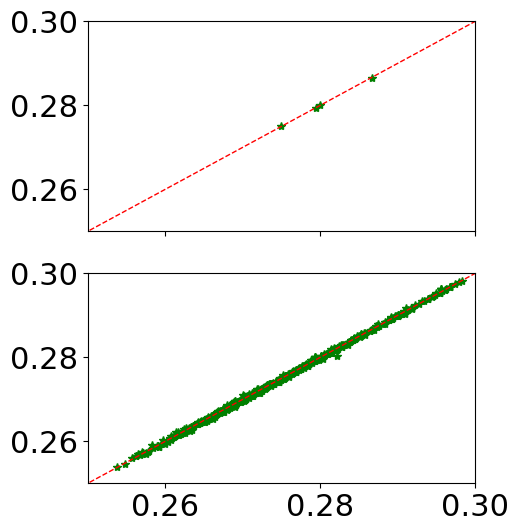

In [14]:

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 6),sharex=True,sharey=True)

quant='MSR'
quant_lab='MSR (a.u.)'
qMAX=0.3
qMIN=0.25
#figname='../figures/Fig2A.png'
#figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig2A.png'



ax1.plot(df_OR.query('U_LOC=="CA1"')[quant].values,df_XOR.query('U_LOC=="CA1"')[quant].values,'g*')
ax1.plot([0, qMAX], [0, qMAX], 'r--', lw=1) ## Diagonal Line
ax1.set_xlim([qMIN,qMAX]);ax1.set_ylim([qMIN,qMAX])

ax2.plot(df_OR.query('U_LOC=="SUB"')[quant].values,df_XOR.query('U_LOC=="SUB"')[quant].values,'g*')
ax2.plot([0, qMAX], [0, qMAX], 'r--', lw=1) ## Diagonal Line
ax2.set_xlim([qMIN,qMAX]);ax2.set_ylim([qMIN,qMAX])

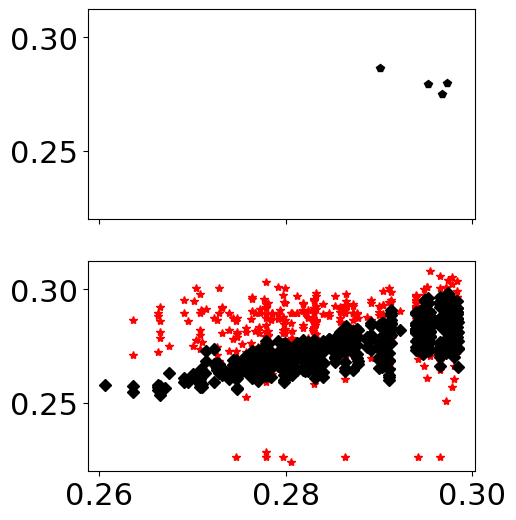

In [15]:

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 6),sharex=True,sharey=True)

quant='MSR'
quant_lab='MSR (a.u.)'
qMAX=0.3
qMIN=0.25
#figname='../figures/Fig2A.png'
#figname2='../../../../Apps/Overleaf/Project_Relevance_of_CA1_SUB/img/Fig2A.png'



ax1.plot(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')[quant].values,'r*')
ax1.plot(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')[quant].values,'kp')
#ax1.plot([0, qMAX], [0, qMAX], 'r--', lw=1) ## Diagonal Line#
#ax1.set_xlim([qMIN,qMAX]);ax1.set_ylim([qMIN,qMAX])

ax2.plot(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')[quant].values,'r*')
ax2.plot(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')[quant].values,'kD')